## Detecting a behavior anomaly

The dataset below contains a location timeserie of a person living alone in their appartment. The data indicates in which location/room he was at which point in time. This data has been collected by sensors installed in the home. This person had a health incident in the night from 2019-09-18 to 2019-09-19, probably at 3:00 or 10:00 which shows in a drastic change in location behavior and resulted in the person going to hospital.

* By the sensor setup in the home, the location `entrance` and `livingroom` are really one single bigger room. Merge them.
* Explore the data and give an overview of key metrics (graphically and quantitatively)
* Can you say something about the living routines of the person?

Propose one or more methods to detect the incident in "real time" by analyzing the location data. Real-time means, that while time passes more and more of the data gets "known" to your detection method. It can trigger as soon as the incident is detected, an action can be triggered.

We are interested in understanding how you proceed in analyzing this case. 
* Show your thought process 
* What methods did you try and why
* What are their strength and weaknesses of the approaches. Are they robust and generalizable to other users?
* How do you test your code for correctness?

We are looking forward to your propositions!

PS: You are free to use other Python libraries as desired. Please return your Notebook as an answer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, time

#df = pd.read_pickle("locations.pkl").sort_values('startTime').reset_index(drop=True)
#df.loc[df.customerLocationState=='entrance','customerLocationState'] = 'livingroom' #merge entrance and living room
#df = df.drop(df.index[-1]) #last row has NaT in endTime

Let's now turn the data into a time series, with location snapshots evenly spaced in time.

In [2]:
#ts = pd.DataFrame(index=pd.date_range(start='2018-06-02',end='2019-10-01', freq='min', tz='Europe/Zurich'), columns=['location'])
#for idx in df.index:
#    start_time = df.loc[idx,'startTime']
#    end_time = df.loc[idx,'endTime']
#    ts.loc[start_time:end_time, 'location'] = df.loc[idx,'customerLocationState']
#ts = ts.drop(ts.index[-1])#otherwise the last date has only one minute

To get an idea of any patterns in the subject's daily routine, let's reshape the time series into a "calendar" format, i.e. one row for each day and one column for each minute, and plot it in a heatmap. Since the time series has categorical values, we will need to encode the categories numerically.

In [3]:
#location_to_int = {'bedroom':1,'bathroom':2,'livingroom':3,'outside':4,'unknown':5,'disabled':6,'unhealthy':7}

In [4]:
#unique_days = pd.DatetimeIndex(np.unique(ts.index.date))
#unique_minutes = np.unique(ts.index.time)
#calendar = pd.DataFrame(ts.values.reshape(len(unique_days), len(unique_minutes)), index=unique_days, columns=unique_minutes)
#calendar_num = pd.DataFrame(ts.location.map(location_to_int).values.reshape(len(unique_days), len(unique_minutes)), index=unique_days, columns=unique_minutes)

Let's plot the numerical calendar.

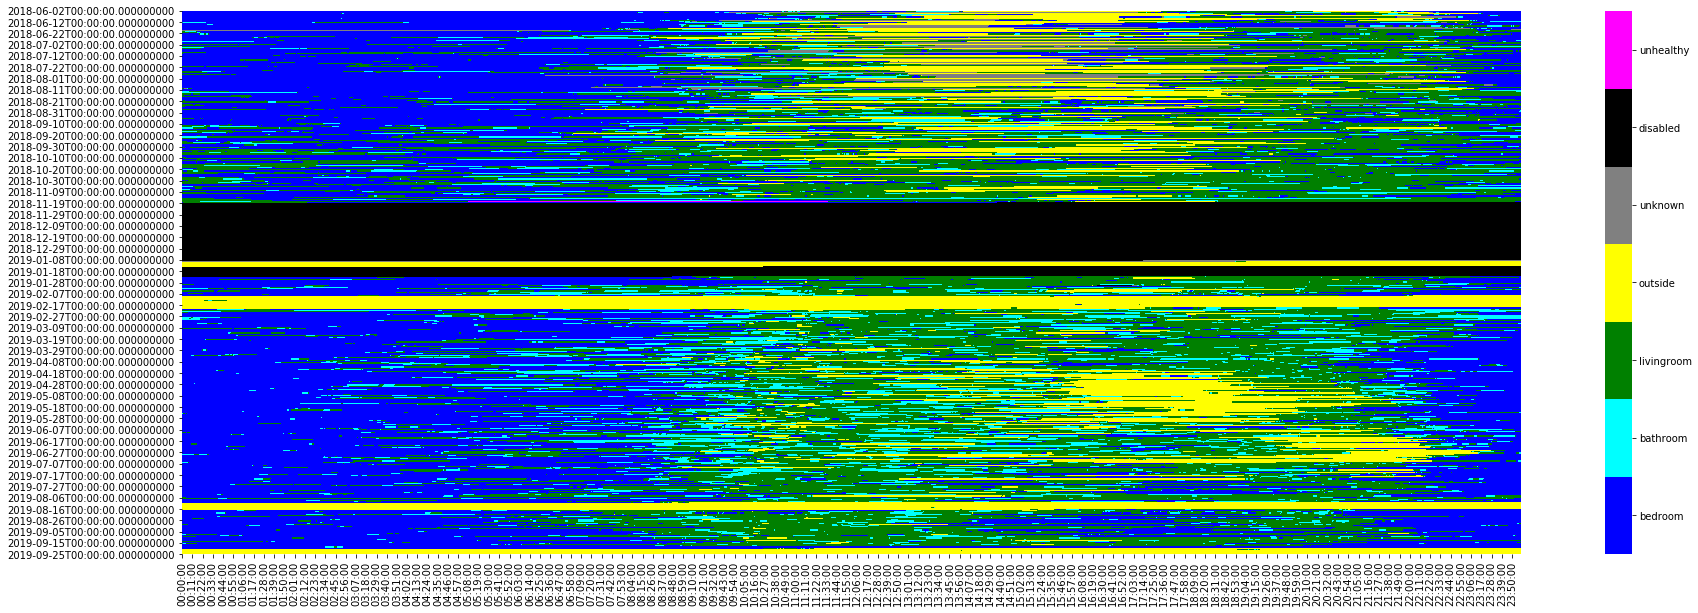

In [6]:
#plt.figure(figsize=(30,10))
#cmap = ['blue','cyan','green','yellow','gray','black','magenta']
#ax = sns.heatmap(calendar_num, cmap=cmap, vmin=1, vmax=7)
#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([1 + 6 / 7 * (0.5 + i) for i in range(7)])
#colorbar.set_ticklabels(['bedroom','bathroom','livingroom','outside','unknown','disabled','unhealthy'])
#plt.show()

The person's routine seems to differ from 2018 to 2019, spending more time outside in the former and more time indoors in the latter. Perhaps the person entered retirement? Let's compare identical months in 2018 and 2019.

/home/pegger/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


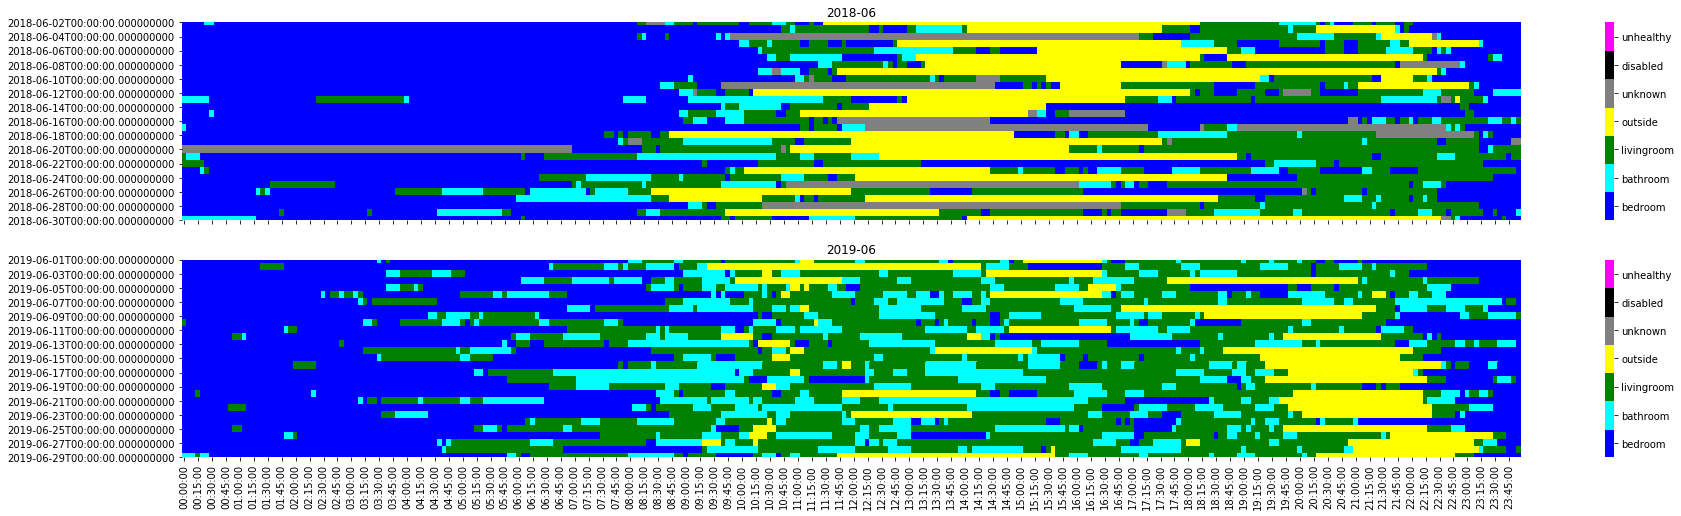

In [7]:
#fig, axes = plt.subplots(figsize=(30,8), nrows=2, sharex=True)
#for i, month in enumerate(['2018-06','2019-06']):
#    sns.heatmap(calendar_num.loc[month,::5], cmap=cmap, vmin=1, vmax=7, ax=axes[i])
#    colorbar = axes[i].collections[0].colorbar
#    colorbar.set_ticks([1 + 6 / 7 * (0.5 + i) for i in range(7)])
#    colorbar.set_ticklabels(['bedroom','bathroom','livingroom','outside','unknown','disabled','unhealthy'])
#    axes[i].set_title(month)
#fig.show()

Therefore, if we train our model on both 2018 and 2019, it will probably not perform equally well on both years. Let's nonetheless use all data available: if the person enters retirement, eventually there will be a lot more retirement data than working data.

One question that comes to mind is: if the sensors are located in the home, how can they tell the difference between when the person is outside, unknown, or unhealthy and how would this differ from when the sensors are disabled? Why not simply combine all these to one 'out of range' category?

In [10]:
#df_clean = df.drop(df[(df.customerLocationState=='disabled')|(df.customerLocationState=='unknown')|(df.customerLocationState=='outside')|(df.customerLocationState=='unhealthy')].index)

In [11]:
#ts_clean = pd.DataFrame(index=pd.date_range(start='2018-06-02',end='2019-10-01', freq='min', tz='Europe/Zurich'), columns=['location'])
#for idx in df_clean.index:
#    start_time = df_clean.loc[idx,'startTime']
#    end_time = df_clean.loc[idx,'endTime']
#    ts_clean.loc[start_time:end_time, 'location'] = df_clean.loc[idx,'customerLocationState']
#ts_clean = ts_clean.drop(ts_clean.index[-1])
#ts_clean = ts_clean.fillna('out_of_range')
#ts_clean['time'] = ts_clean.index.time

In [12]:
#location_to_int_clean = {'bedroom':1,'bathroom':2,'livingroom':3,'out_of_range':4}

In [13]:
#calendar_clean = pd.DataFrame(ts_clean.location.values.reshape(len(unique_days), len(unique_minutes)), index=unique_days, columns=unique_minutes)
#calendar_num_clean = pd.DataFrame(ts_clean.location.map(location_to_int_clean).values.reshape(len(unique_days), len(unique_minutes)), index=unique_days, columns=unique_minutes)

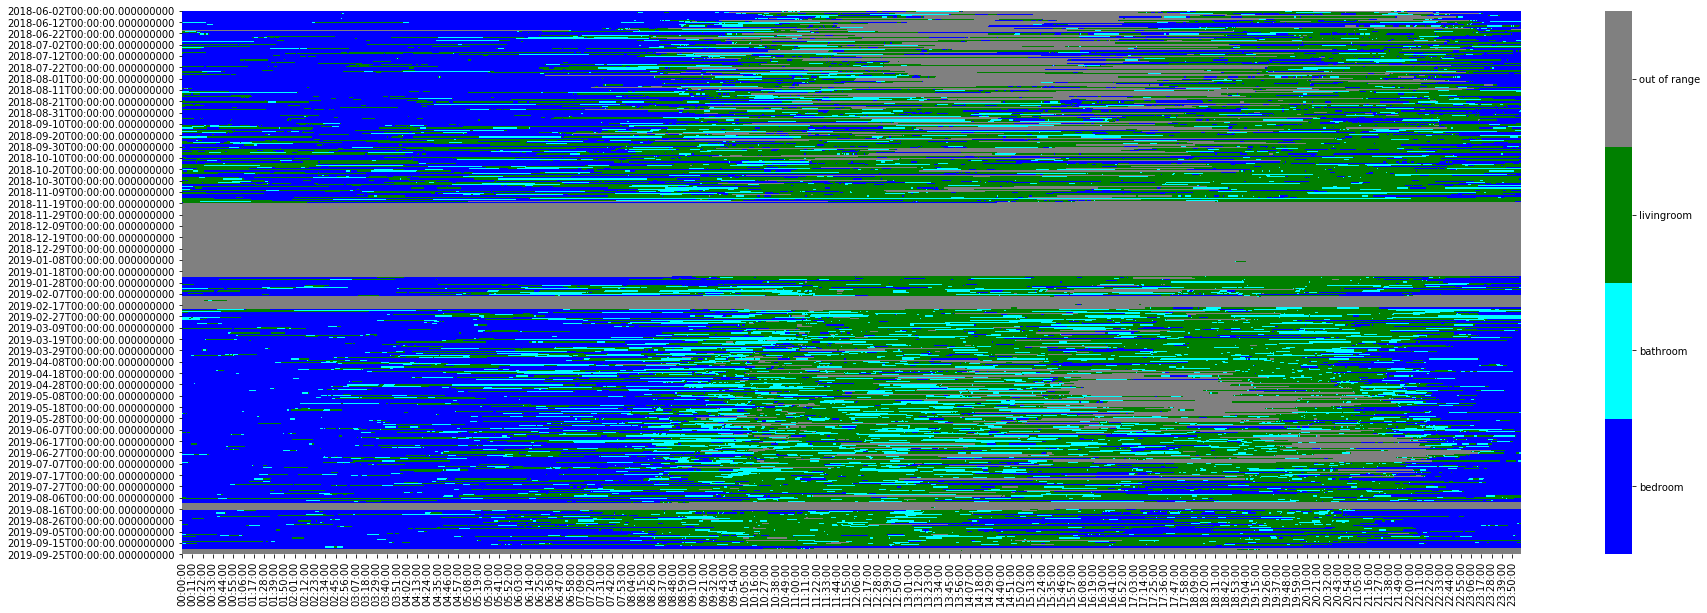

In [14]:
#plt.figure(figsize=(30,10))
#cmap_clean = ['blue','cyan','green','gray']
#ax = sns.heatmap(calendar_num_clean, cmap=cmap_clean, vmin=1, vmax=4)
#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([colorbar.vmin + 3 / 4 * (0.5 + i) for i in range(4)])
#colorbar.set_ticklabels(['bedroom','bathroom','livingroom', 'out of range'])
#plt.show()

This is a bit better but there are still some days-long periods where it is out of range. Let's take those out.

In [15]:
#calendar_clean = calendar_clean.drop(calendar_clean.loc[(calendar_clean == 'out_of_range').all(axis=1)].index)
#calendar_num_clean = calendar_num_clean.drop(calendar_num_clean.loc[(calendar_num_clean == 4).all(axis=1)].index)

In [16]:
#calendar_clean.to_pickle('calendar_clean.pkl')
#calendar_num_clean.to_pickle('calendar_numerical_clean.pkl')

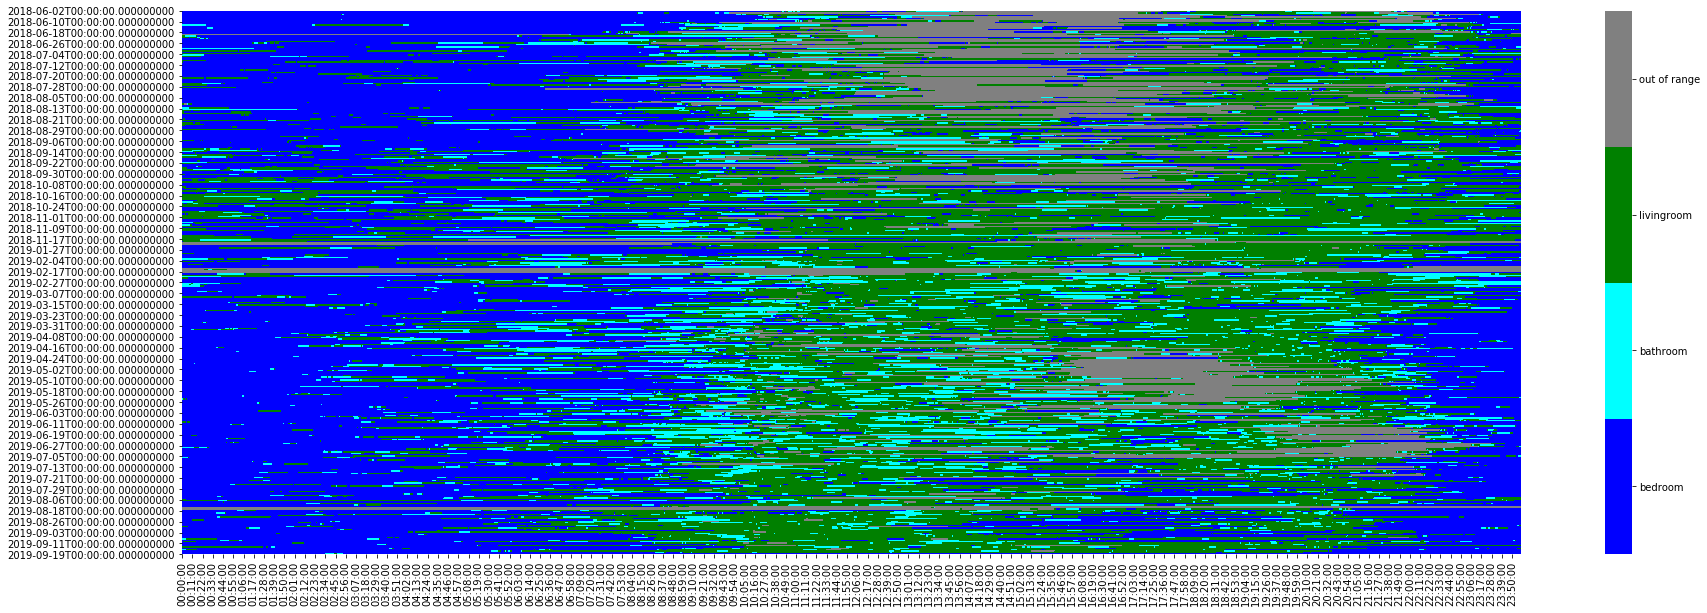

In [17]:
#plt.figure(figsize=(30,10))
#cmap_clean = ['blue','cyan','green','gray']
#ax = sns.heatmap(calendar_num_clean, cmap=cmap_clean, vmin=1, vmax=4)
#colorbar = ax.collections[0].colorbar
#colorbar.set_ticks([colorbar.vmin + 3 / 4 * (0.5 + i) for i in range(4)])
#colorbar.set_ticklabels(['bedroom','bathroom','livingroom', 'out of range'])
#plt.show()

We can leapfrog over the previous preprocessing by simply loading in the categorical and numerical calendars.

In [ ]:
calendar_clean = pd.read_pickle('calendar_clean.pkl')
calendar_num_clean = pd.read_pickle('calendar_numerical_clean.pkl')

Because when the person is healthy, his schedule follows a relatively consistent pattern, finding out when an adverse event occurs will involve anomaly detection. There are certain times when being in the bedroom is plausible e.g. at night and certain times when it is implausible e.g. in the middle of the day. Of course, occasionally one will be in an "implausible" place with good reason, but when one spends a lot of time in an implausible place, that should ring alarms. Thus, recent implausiblity scores should be cumulated, and if the sum exceeds a threshold, that should trigger some event.

The implausibility of being in a given place at a given time of day is inversely proportional to how often the person was in that place at that time of day.

In [18]:
#implausibility = pd.DataFrame(index=unique_minutes, columns=['bedroom','bathroom','livingroom','out_of_range'])
#for minute in unique_minutes:
#    implausibility.loc[minute,:] = 1./(calendar_clean.loc[:,minute].value_counts()+1) #to avoid dividing by 0
#implausibility.to_pickle('implausibility.pkl')
implausibility = pd.read_pickle('implausibility.pkl')

In [19]:
#ts_clean['implausibility'] = 0.0
#for idx in ts_clean.index:
#    minute = ts_clean.loc[idx, 'time']
#    location = ts_clean.loc[idx, 'location']
#    ts_clean.loc[idx, 'implausibility'] = implausibility.loc[minute, location]
#ts_clean.to_pickle('ts_clean.pkl')
ts_clean = pd.read_pickle('ts_clean.pkl')

As mentioned, the alarm should go out if the cumulative implausibility score over a certain number of timesteps (minutes) exceeds a threshold. Let's plot this implausibility time series, with a label for when we know the incident occurred. Since out of range can simply mean the person is on vacation, better to exclude that from the implausibility calculations.

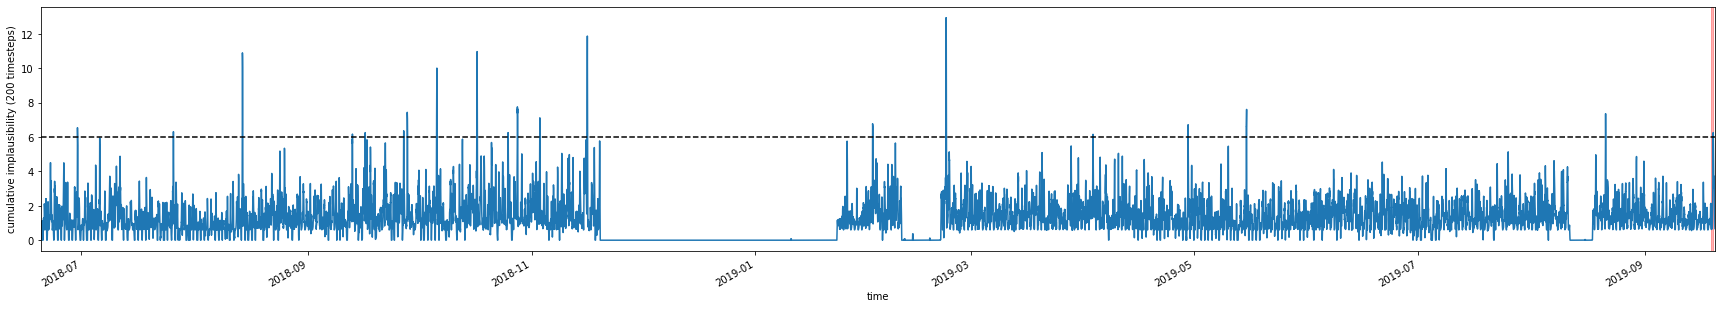

In [60]:
T = 200
plt.figure(figsize=(30,5))
(ts_clean.implausibility * (ts_clean.location!='out_of_range')*1).rolling(T).sum().plot()
plt.xlim('2018-06-20','2019-09-20')
plt.ylabel('cumulative implausibility (%d timesteps)' % T)
plt.xlabel('time')
plt.axvspan('2019-09-18 20:00:00','2019-09-19 10:00:00', alpha=0.3, color='r')
plt.axhline(6, c='k', linestyle='--')
plt.show()

This would work somewhat: the score goes above threshold shortly after noon on the day after the night with the incident. However, it also does so several other times in the year 2019, which apparently is not caused by any health incident. It exceeds threshold even more in 2018 due to the fact that the basis for the implausibility calculations is mostly 2019, when the person's daily schedule is different than in 2018. This would even out with more data.

Most of these threshold exceeding events simply represent the person taking an afternoon nap in the bedroom or an extra long shower in the bathroom. If each of them triggers the calling of an ambulance, it would be a disaster, with too many false alarms.

Instead, these events should simply trigger a message or phone call to the person asking: "are you OK?" Only if the person responds "no," or fails to respond at all, should medical help be sought.

Some advantages of this method:
1. It uses time series produced by sensors
2. The dwelling can be partitioned into whatever categories are appropriate. In our case it was "bedroom", "livingroom", "bathroom" and "out_of_range", but that is adaptable.
3. It uses data to determine when a person is normally in a given location. The implausibility scores will thus be different for someone who is usually watching TV in the living room late into the night and sleeps till noon, or has a long morning bathroom ritual.

Some disadvantages:
1. To get an idea of the person's schedule requires a bit of data to be personalized and this takes time. It cannot be that you buy the device and then plug and play.
2. Excessive wellness checks could annoy the person to the extent that he discontinues use.
3. Establishing the threshold and the number of timesteps for cumulating implausibility (our T) is personalized and thus difficult to do.

Some tradeoffs:
By reducing T, we can make it detect events quicker (but more false positives) and respectively we can increase T, which makes it slower to detect events, but likely fewer false positives. Same applies to playing with the threshold.